# Diamond Price Prediction

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Brief-Description">Brief Description<a class="anchor-link" href="https://www.kaggle.com/code/hiteshbhakuni/diamond-price-prediction/#Brief-Description" target="_self" rel=" noreferrer nofollow">¶</a></h3><p>The dataset for this project contains attributes and prices of around 54,000 diamonds.</p>
<p><strong>Objectives:</strong></p>
<p>Perform an Explanatory Data Analysis (EDA).
Create a machine learning model to predict the diamond prices.
Regression models used: Linear, Polynomial, Ridge, Lasso, and CatBoost.</p>
<p>The ten features and target are :</p>
<ol>
<li>Weight (carat): weight of the diamond.</li>
<li>Length (x): length of the diamond.</li>
<li>Width (y): width of the diamond</li>
<li>Depth (z): depth of the diamond.</li>
<li>%Depth: depth percentage. Formula: z / mean(x, y) = 2 * z / (x + y)</li>
<li>Table: width of top of the diamond relative to the widest point.</li>
<li>Quality: quality of the diamond. Possible values (from best to worst): ideal, premium, very good, good, fair.</li>
<li>Color: color of the diamond. Possible values: from D (best) to J (worst).</li>
<li>Clarity: measurement of how clear the diamond is. Possible values (from best to worst): IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.</li>
<li>Price (target): price of the diamond in US dollars.</li>
</ol>

</div>

In [5]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('Diamonds Prices2022.csv')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There are no missing values present in the dataset

In [9]:
# Dropping the Unnamed column
data = data.drop('Unnamed: 0', axis=1)

In [10]:
data.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


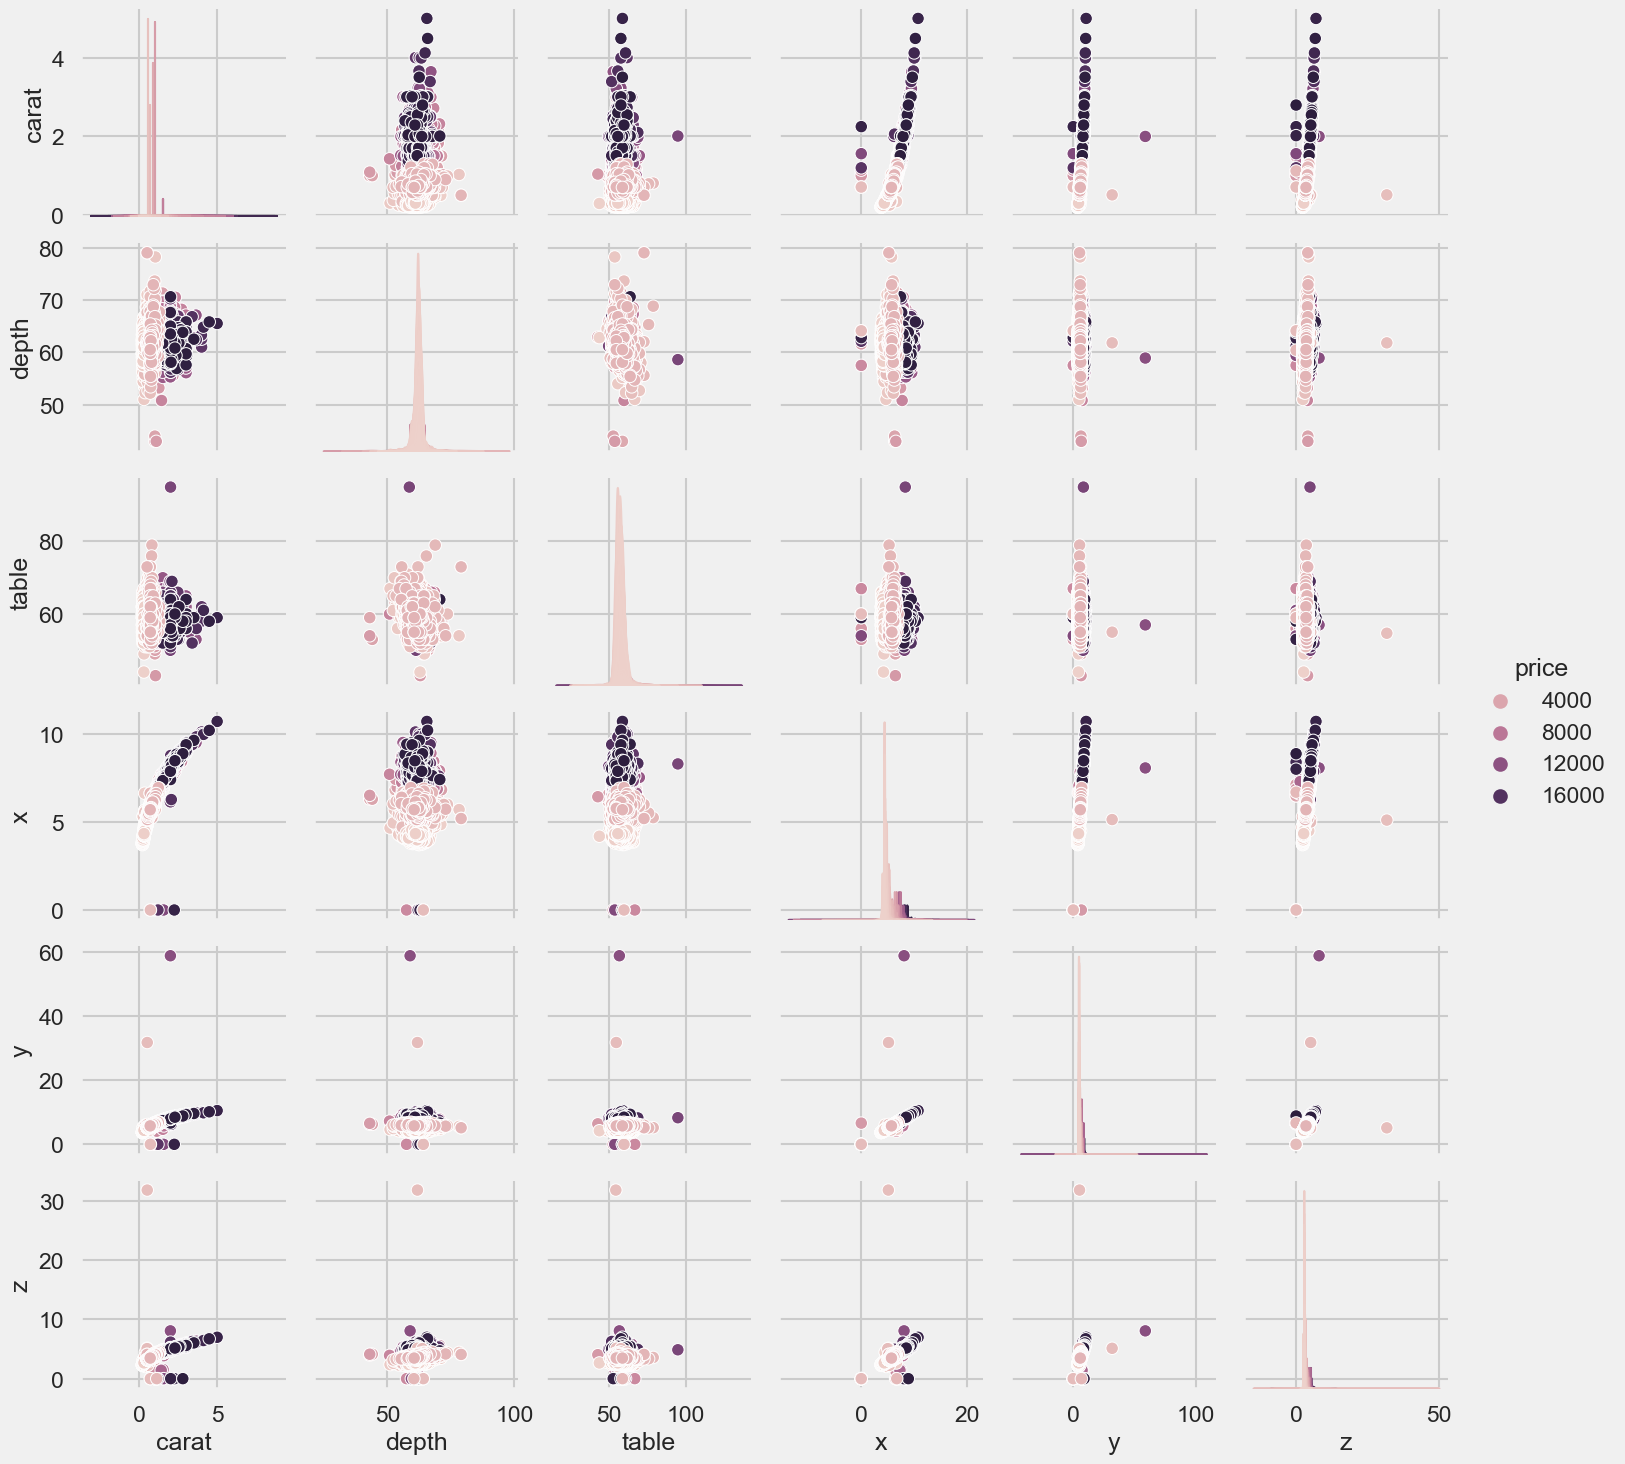

In [8]:
# Checking for correlation
sns.set_context('talk')
sns.pairplot(data, hue='price')

In [11]:
#Analyzing the object columns
for col in data.select_dtypes(include=['object']):
    print(np.unique(data[col]))

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


This is a good reminder that we have an ordinal column in 'cut' where as the rest object column is a categorical column.

#### Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])

In [13]:
print(np.unique(data.cut))

[0 1 2 3 4]


(8.5, -0.5)

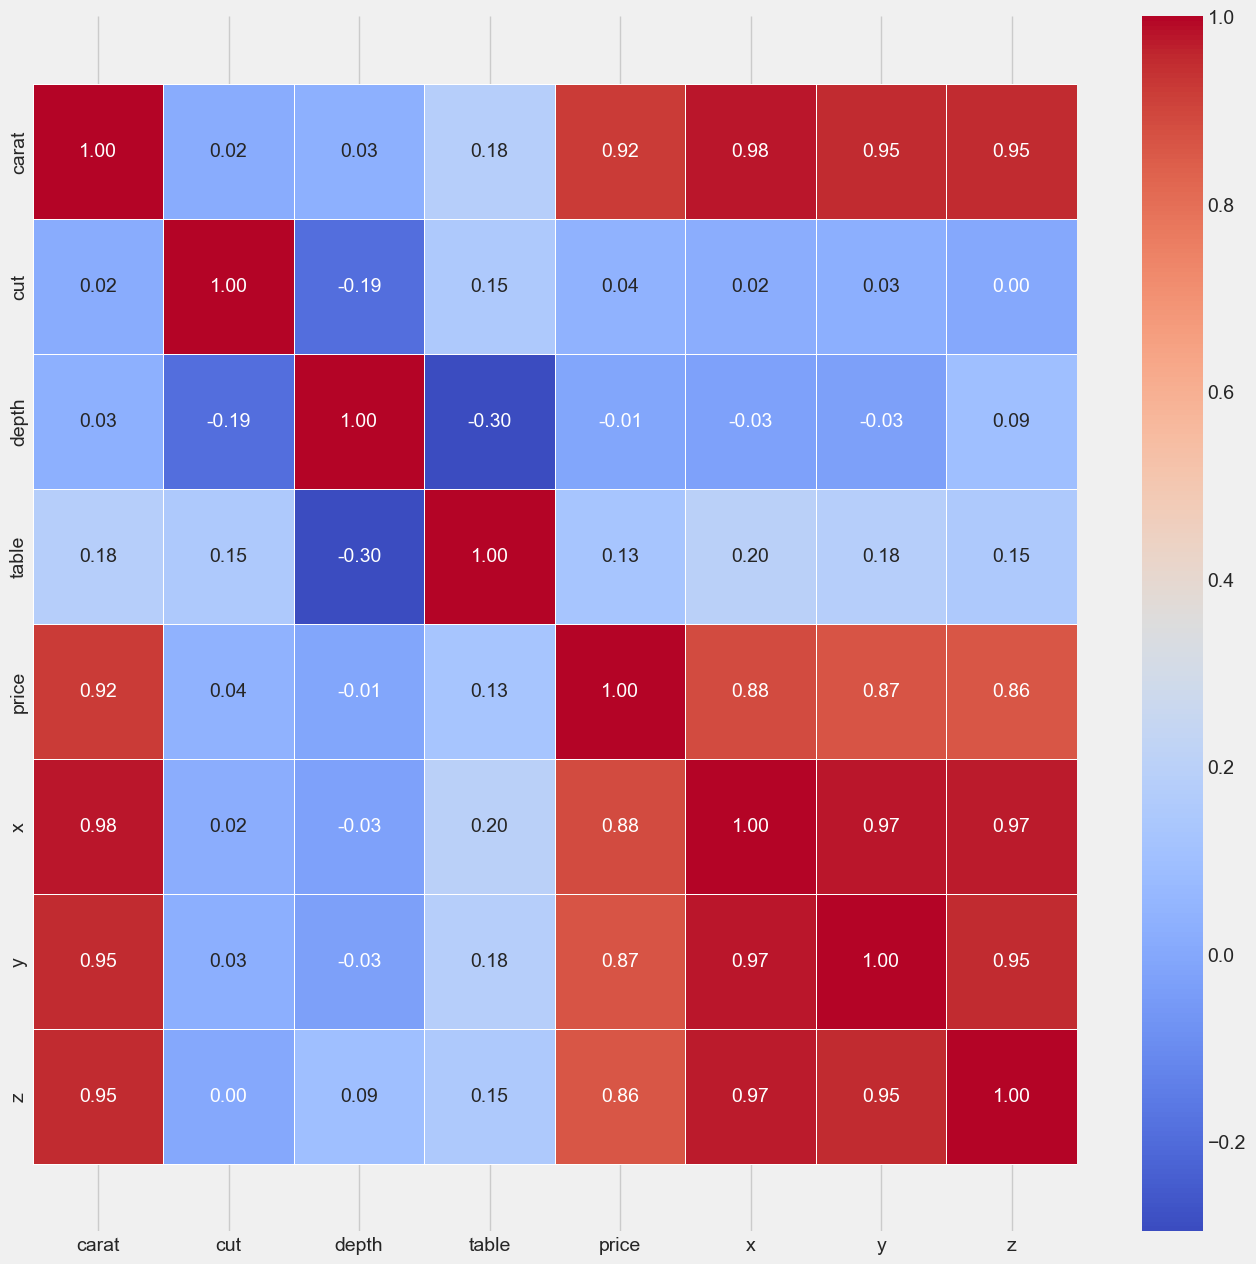

In [15]:
# Lets know the correlations between features using Heat Map!
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [17]:
# Identifying the highly correlated features against the target variable 'price'
numeric_data.corr()['price'].sort_values(ascending = False).drop('price')

carat    0.921591
x        0.884433
y        0.865419
z        0.861249
table    0.127118
cut      0.039847
depth   -0.010630
Name: price, dtype: float64

As we saw, the strongest correlated features against 'price' is carat, x, y and z.

NormaltestResult(statistic=21919.72992692243, pvalue=0.0)

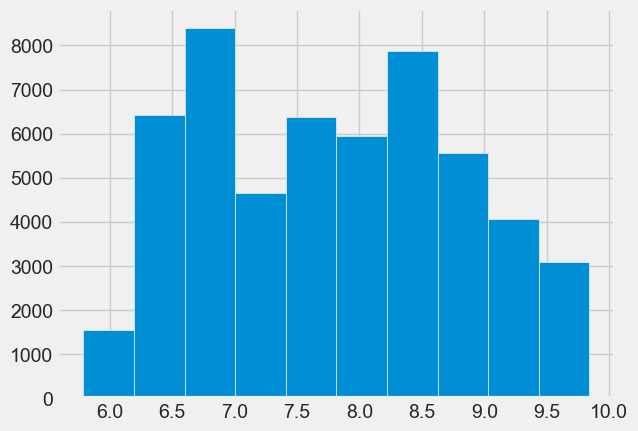

In [24]:
# applying log transformation on 'price'
log_charges = np.log(data.price)
plt.hist(log_charges)

# applying D'Agostino K^2 test to check the normality! 
log_test_res = normaltest(log_charges.values)
log_test_res

In [25]:
# applying box cox on 'price'
from scipy.stats import boxcox

bc_result = boxcox(data.price)
boxcox_medv = bc_result[0]
lam = bc_result[1]

NormaltestResult(statistic=27439.997077303116, pvalue=0.0)

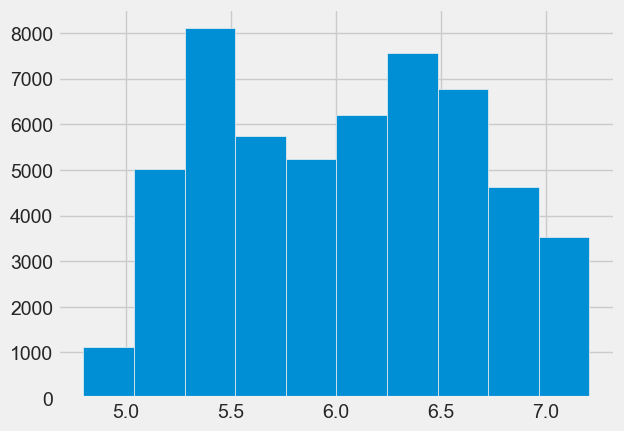

In [26]:
plt.hist(boxcox_medv)
boxcox_test_res= normaltest(boxcox_medv)
boxcox_test_res

In [23]:
# Converting the object categorical columns using One-Hot encoding
for column in data.select_dtypes(include=['object']).columns:
    ohc = OneHotEncoder()
    encoded_columns = ohc.fit_transform(data[[column]]).toarray()
    encoded_df = pd.DataFrame(encoded_columns, columns=ohc.get_feature_names_out([column]))
    data = pd.concat([data, encoded_df], axis=1)
    data.drop(column, axis=1, inplace=True)

In [24]:
data.head()

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
# Copy the processed data to a new variable for Kfold split
kfold_data = data.copy()

#### Building Regression Models

In [26]:
# Importing the neccessary libraries for preprocessing and machine learning
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [18]:
X = data.drop(['price'], axis=1)
y = data.price

In [24]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

X_pf = pf.fit_transform(X)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, shuffle=True, test_size=0.3, random_state=42)

In [56]:
# Function for root mean square error and r2
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

#### Vanilla Linear Regression

In [26]:
linearRegression = LinearRegression()

linearRegression.fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 

print(linearRegression_rmse)
print(linearRegression_R2)

1588.8188353340868
0.8369282829489186


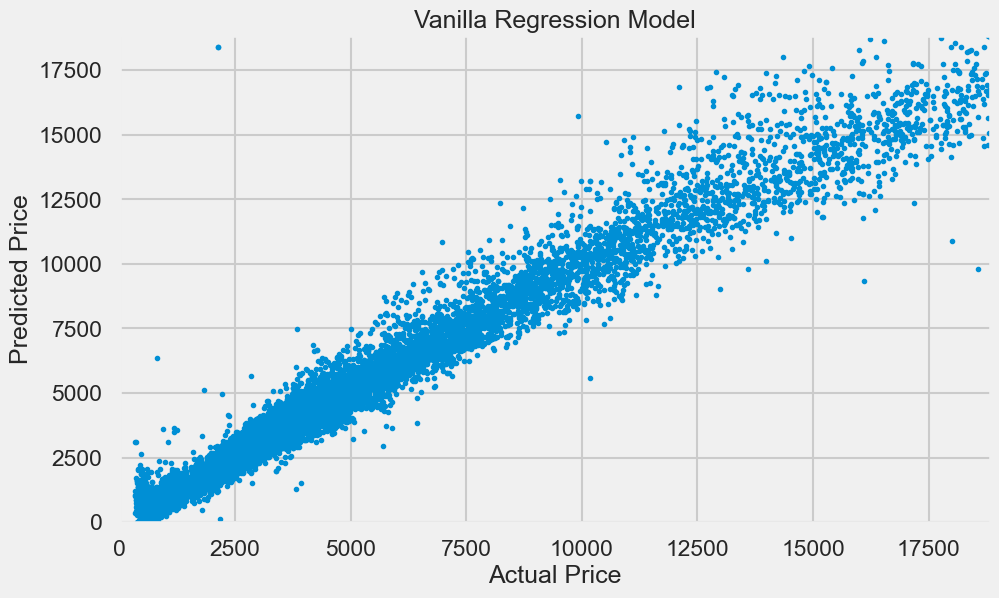

In [28]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Vanilla Regression Model');

#### Lasso Regression

In [32]:
alphas = np.geomspace(0.1, 400, 1000)
lassoCV = LassoCV(alphas=alphas, max_iter=10000, cv=3)
lassoCV.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.00833691e-01, 1.01674333e-01, 1.02521983e-01,
       1.03376700e-01, 1.04238542e-01, 1.05107570e-01, 1.05983842e-01,
       1.06867420e-01, 1.07758364e-01, 1.08656736e-01, 1.09562598e-01,
       1.10476012e-01, 1.11397041e-01, 1.12325748e-01, 1.13262198e-01,
       1.14206455e-01, 1.15158584e-01, 1.16118651e-01, 1.17086722e-01,
       1.18062864e-01, 1.19047143e-0...
       3.30468205e+02, 3.33223289e+02, 3.36001342e+02, 3.38802556e+02,
       3.41627123e+02, 3.44475239e+02, 3.47347098e+02, 3.50242901e+02,
       3.53162845e+02, 3.56107132e+02, 3.59075966e+02, 3.62069551e+02,
       3.65088093e+02, 3.68131800e+02, 3.71200883e+02, 3.74295552e+02,
       3.77416021e+02, 3.80562505e+02, 3.83735221e+02, 3.86934388e+02,
       3.90160226e+02, 3.93412958e+02, 3.96692807e+02, 4.00000000e+02]),
        cv=3, max_iter=10000)

In [33]:
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

print(lassoCV.alpha_, lassoCV_rmse)
print(lassoCV_R2)

5.379222587195116 702.6860954874735
0.968102796835838


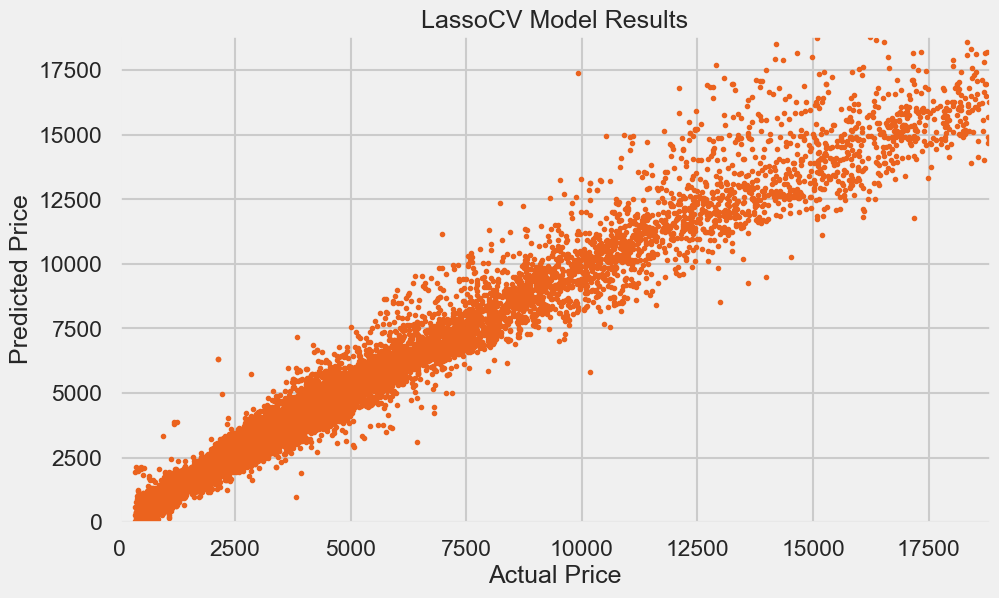

In [34]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', color='#eb631e', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='LassoCV Model Results');

#### Ridge Regression

In [36]:
alphas = np.geomspace(0.01, 20, 1000).tolist()
ridgeCV = RidgeCV(alphas=alphas, cv=3)
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.01007637529238691, 0.010153333903302544,
                0.01023088028785921, 0.010309018935195287, 0.01038775436873506,
                0.010467091146450613, 0.01054703386112568, 0.010627587140621491,
                0.01070875564814473, 0.010790544082517433, 0.010872957178449043,
                0.01095599970681049, 0.011039676474910344, 0.011123992326773167,
                0.011208952143419871, 0.011294560843150328, 0.01138082338182807,
                0.011467744753167159, 0.011555329989021325,
                0.011643584159675197, 0.011732512374137876,
                0.011822119780438664, 0.011912411565925072,
                0.012003392957563152, 0.012095069222240037,
                0.012187445667068888, 0.01228052763969609, 0.012374320528610823,
                0.012468829763457027, ...],
        cv=3)

In [37]:
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test)) 

print(ridgeCV.alpha_, ridgeCV_rmse)
print(ridgeCV_R2)

20.0 791.7394738480549
0.959505645454924


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 18823.0),
 (0.0, 18823.0),
 Text(0.5, 1.0, 'Ridge Model Results')]

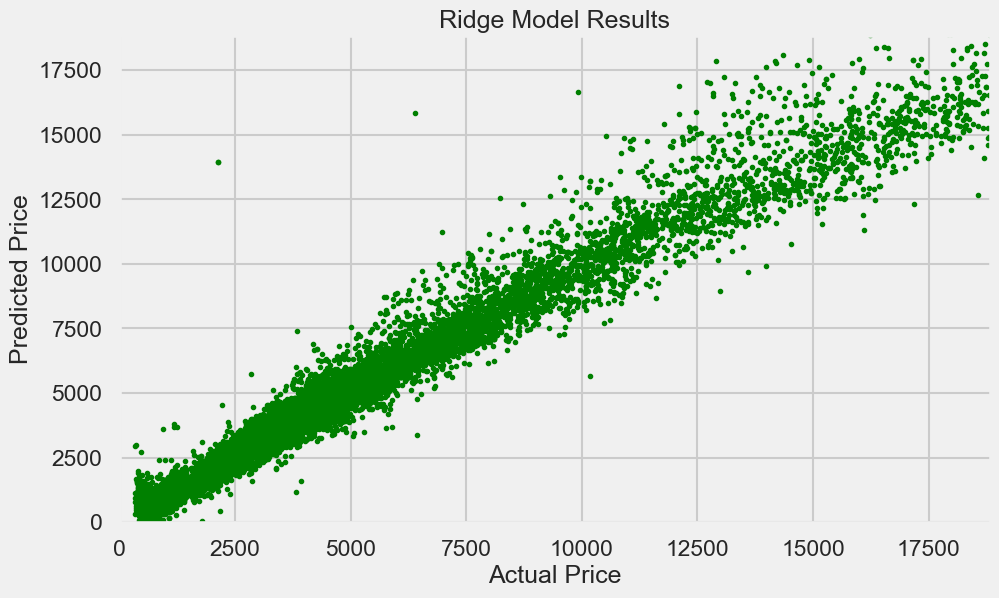

In [38]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), 
         marker='o', ls='', color='g', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Ridge Model Results')

#### ElasticNetCV

In [41]:
alphas = np.geomspace(0.001, 1, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

elasticNetCV = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, max_iter=int(1e4))
elasticNetCV.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,...
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
             l1_ratio=array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ]),
             max_iter=10000)

In [42]:
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
print(ridgeCV_R2)

0.12328467394420659 0.9 717.0028927778961
0.959505645454924


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 18823.0),
 (0.0, 18823.0),
 Text(0.5, 1.0, 'elasticNetCV Model Results')]

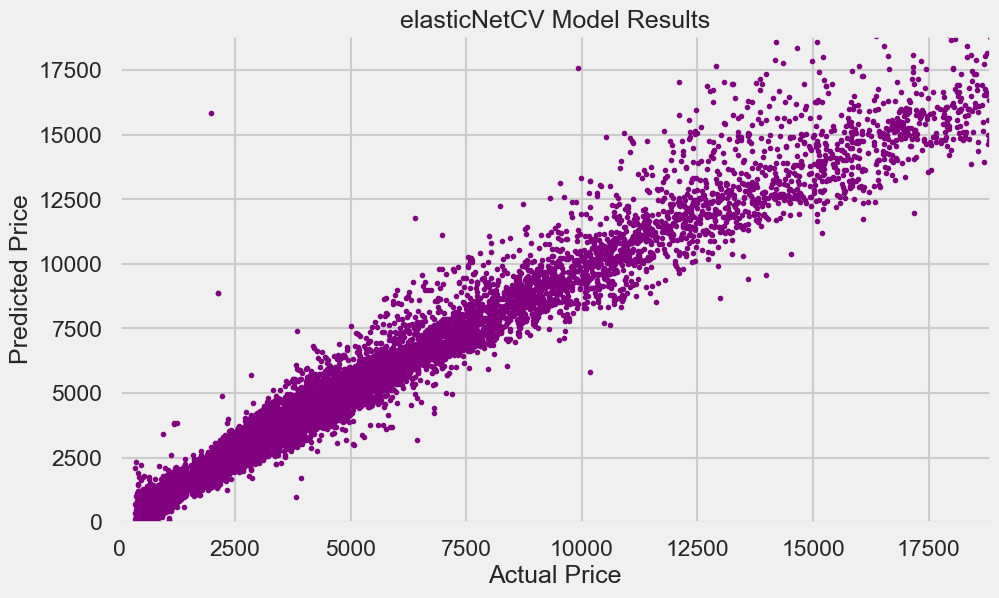

In [44]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), 
         marker='o', ls='', color='purple', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='elasticNetCV Model Results')

In [66]:
# Arranging all the result in a DataFrame
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear', 'LassoCV', 'RidgeCV', 'ElasticNetCV']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,1588.818835,0.836928
LassoCV,702.686095,0.968103
RidgeCV,791.739474,0.959506
ElasticNetCV,717.002893,0.966790


#### Using KFold for splitting

In [27]:
X_fold = kfold_data.drop(['price'], axis=1)
y_fold = kfold_data.price

kf = KFold(shuffle=True, random_state=42, n_splits=3)

#### Vanilla Linear Regression with Kfold

In [28]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    "polynomial_features__degree": range(3),
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_fold, y_fold)
grid.best_score_, grid.best_params_

(0.9186944793019823, {'polynomial_features__degree': 1})

In [29]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=1)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X_fold, y_fold)

best_vanilla_estimator.score(X_fold, y_fold)

0.9189589569061878

#### Ridge Regression with Kfold

In [30]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X_fold, y_fold)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 2.        ,  2.30637295,  2.65967809,  3.0671048 ,  3.53694377,
        4.07875572,  4.70356592,  5.4240886 ,  6.25498562,  7.21316481,
        8.3181241 ,  9.5923482 , 11.0617662 , 12.75627917, 14.7103686 ,
       16.9637981 , 19.56242252, 22.55912106, 26.01487328, 30.        ])})

In [31]:
grid.best_score_, grid.best_params_

(0.9186995023746819,
 {'polynomial_features__degree': 1,
  'ridge_regression__alpha': 9.592348198940915})

In [32]:
best_ridge_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=1)),
                    ("ridge_regression", Ridge(alpha=9.59))])

best_ridge_estimator.fit(X_fold, y_fold)

Pipeline(steps=[('scaler', StandardScaler()),
                ('make_higher_degree', PolynomialFeatures(degree=1)),
                ('ridge_regression', Ridge(alpha=9.59))])

In [33]:
best_ridge_estimator.score(X_fold, y_fold)

0.9189570596405445